In [ ]:
# How did the global amount of renewable energy develop from 1970–2015?
# Which countries had the highest average annual growth rate for renewable energy in the period 1990–2015?
# When was the largest absolute annual increase worldwide (the year with the biggest global delta)?
# Which countries contributed the most to global growth in specific periods (e.g., 1990–2000, 2000–2010, 2010–2015)?
# Which countries were the earliest to show a sustained turnaround in the build‑out of renewables — and how early was that compared to the global average?

In [30]:
import pandas as pd

df = pd.read_csv('renewable_energy.csv', index_col=0, sep=',', header=0)

print (df)


          INDICATOR SUBJECT           MEASURE FREQUENCY  TIME     Value  \
LOCATION                                                                  
AUS       RENEWABLE     TOT              KTOE         A  1960  4436.932   
AUS       RENEWABLE     TOT              KTOE         A  1961  4490.510   
AUS       RENEWABLE     TOT              KTOE         A  1962  4407.097   
AUS       RENEWABLE     TOT              KTOE         A  1963  4628.738   
AUS       RENEWABLE     TOT              KTOE         A  1964  4497.396   
...             ...     ...               ...       ...   ...       ...   
OECD      RENEWABLE     TOT  PC_PRYENRGSUPPLY         A  2011     8.150   
OECD      RENEWABLE     TOT  PC_PRYENRGSUPPLY         A  2012     8.710   
OECD      RENEWABLE     TOT  PC_PRYENRGSUPPLY         A  2013     9.160   
OECD      RENEWABLE     TOT  PC_PRYENRGSUPPLY         A  2014     9.380   
OECD      RENEWABLE     TOT  PC_PRYENRGSUPPLY         A  2015     9.640   

         Flag Codes  
LO

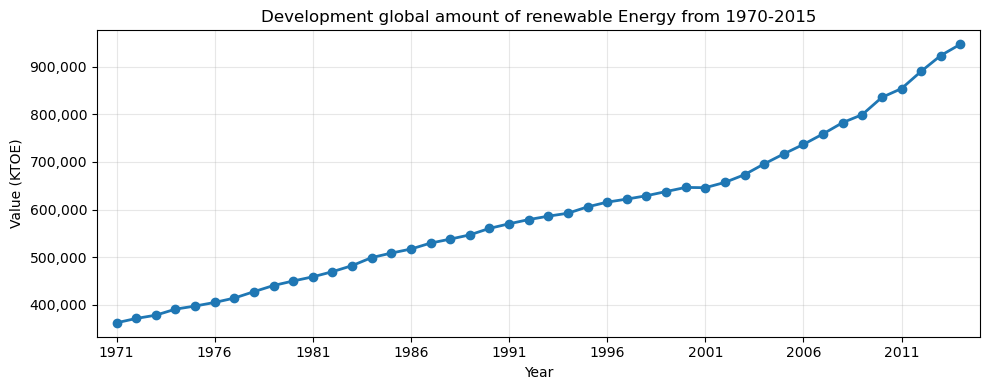

Saved aggregated WLD plot to: wld_aggregated.png


In [31]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


csv_path = 'renewable_energy.csv'  
output_img = 'wld_aggregated.png'   
output_csv = 'wld_yearly.csv'       
agg_method = 'median'             



df = pd.read_csv(csv_path)


df.columns = df.columns.str.strip().str.replace('"', '')

wld = df[df['LOCATION'] == 'WLD'].copy()


wld['TIME'] = pd.to_numeric(wld['TIME'], errors='coerce').astype('Int64')
wld['Value'] = pd.to_numeric(wld['Value'], errors='coerce')


if agg_method == 'median':
    wld_yearly = wld.groupby('TIME', sort=True)['Value'].median().dropna()
elif agg_method == 'mean':
    wld_yearly = wld.groupby('TIME', sort=True)['Value'].mean().dropna()
elif agg_method == 'sum':
    wld_yearly = wld.groupby('TIME', sort=True)['Value'].sum().dropna()
else:
    raise ValueError("agg_method must be one of 'median','mean','sum'")




fig, ax = plt.subplots(figsize=(10,4))
ax.plot(wld_yearly.index, wld_yearly.values, marker='o', linewidth=2, color='C0')
ax.set_title(f'Development global amount of renewable Energy from 1970-2015')
ax.set_xlabel('Year')
ax.set_ylabel('Value (KTOE)')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))


start, end = int(wld_yearly.index.min()), int(wld_yearly.index.max())
ax.set_xticks(range(start, end+1, 5))
ax.set_xlim(start-1, end+1)

ax.grid(alpha=0.3)
plt.tight_layout()


plt.show()
fig.savefig(output_img, dpi=150)
print(f"Saved aggregated WLD plot to: {output_img}")


In [32]:
import pandas as pd

csv_path = 'renewable_energy.csv'
out_csv = 'diff_1990_2015_positive_only.csv'

df = pd.read_csv(csv_path)
df.columns = df.columns.str.strip().str.replace('"', '')
df['TIME'] = pd.to_numeric(df['TIME'], errors='coerce').astype('Int64')
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')



y1, y2 = 1990, 2014


pivot = (
    df[df['TIME'].isin([y1, y2])]
    .groupby(['LOCATION', 'TIME'])['Value']
    .median()
    .unstack(level='TIME')
)


pivot = pivot.rename(columns={y1: f'Value_{y1}', y2: f'Value_{y2}'})


pivot['abs_diff'] = pivot[f'Value_{y2}'] - pivot[f'Value_{y1}']
pivot['pct_change'] = (pivot[f'Value_{y2}'] - pivot[f'Value_{y1}']) / pivot[f'Value_{y1}'] * 100


positive_only = pivot[pivot['abs_diff'] > 0].reset_index()


positive_only = positive_only.replace([pd.NA], pd.NA)    
positive_only['pct_change'] = positive_only['pct_change'].replace([float('inf'), -float('inf')], pd.NA)


positive_only = positive_only.sort_values(by='abs_diff', ascending=False)


positive_only.to_csv(out_csv, index=False)
print(f'Saved {len(positive_only)} positive rows to {out_csv}')
print(positive_only.head(130).to_string(index=False))



Saved 123 positive rows to diff_1990_2015_positive_only.csv
LOCATION  Value_1990  Value_2014    abs_diff   pct_change
     WLD 560628.4375 947016.2205 386387.7830    68.920475
     G20 376423.4690 626536.0870 250112.6180     66.44448
    OECD 135365.3375 247431.0415 112065.7040    82.787593
     CHN 105680.9490 171446.0415  65765.0925    62.229847
     OEU  46862.6215 112016.8400  65154.2185   139.032381
    EU28  35962.5395 100647.9290  64685.3895   179.868803
     IND  69838.3535 104357.3505  34518.9970    49.426991
     NGA  26436.4065  54573.1080  28136.7015   106.431642
     USA  48085.0660  76160.9090  28075.8430    58.387864
     BRA  32790.1450  58512.7100  25722.5650    78.446024
     IDN  22993.1900  38841.8615  15848.6715    68.927676
     DEU   2657.2410  17707.6755  15050.4345   566.393282
     ETH  11107.9320  22800.6025  11692.6705   105.264153
     ITA   3238.3035  13265.2995  10026.9960   309.637315
     COD   5285.2745  13591.6075   8306.3330   157.159917
     PAK  10

In [33]:
pip install geopandas


Note: you may need to restart the kernel to use updated packages.


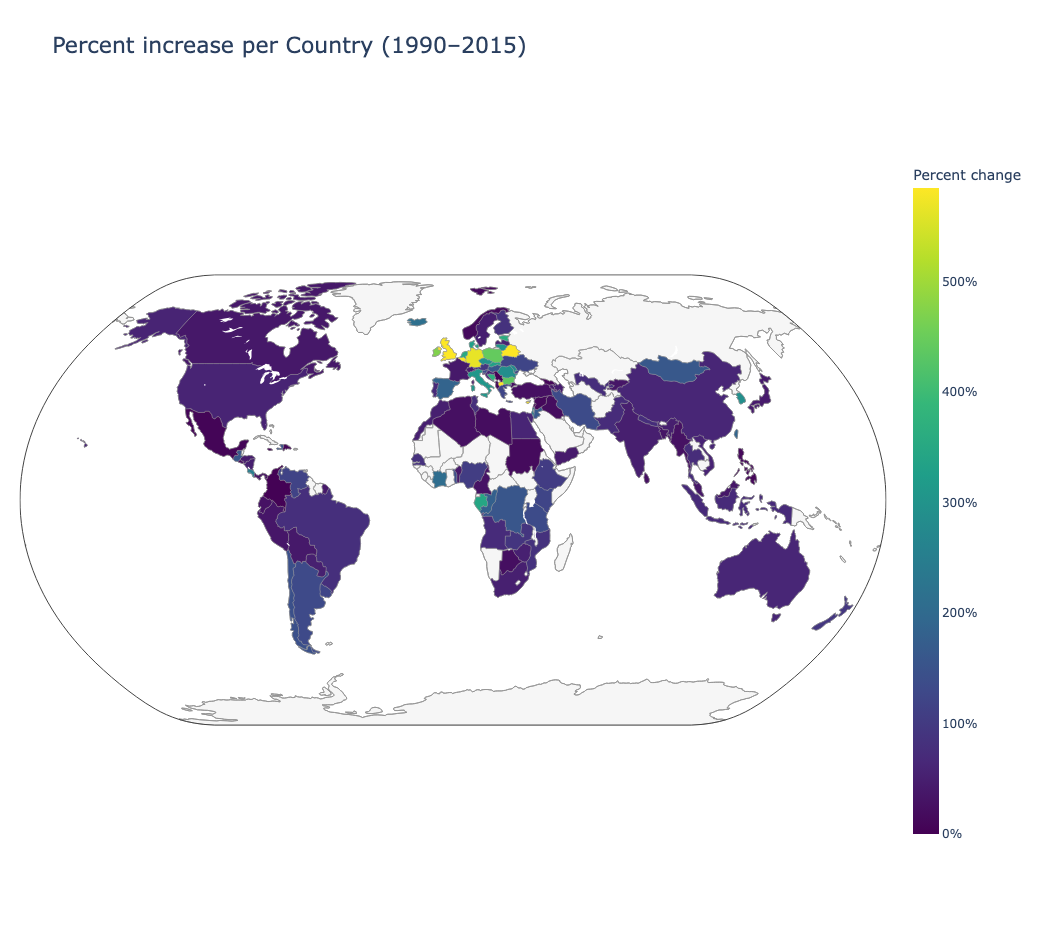

In [35]:
import pandas as pd
import re, unicodedata
import numpy as np
import plotly.graph_objects as go


CSV_IN = 'diff_1990_2015_positive_only.csv'
TITLE = 'Percent increase per Country (1990–2015)'
COLOR_SCALE = 'Viridis'  
QUANTILE_CLIP = 0.95      
FIG_SIZE = 950           


df = pd.read_csv(CSV_IN, dtype=str).fillna('')

def aggressive_iso3(s):
    s = '' if s is None else str(s)
    s = unicodedata.normalize('NFKD', s)
    s = s.strip().strip('"').strip("'")
    letters = re.findall(r'[A-Za-z]', s)
    return ''.join(letters).upper()

src_col = 'LOCATION_CLEAN' if 'LOCATION_CLEAN' in df.columns else 'LOCATION'
df['LOCATION_AGG'] = df[src_col].apply(aggressive_iso3)


locs = df['LOCATION_AGG']
iso_mask = (locs.str.len() == 3) & locs.str.isalpha() & (locs.str.upper() == locs)
df_iso = df[iso_mask].copy()

if 'pct_change' not in df_iso.columns:
    raise ValueError("Spalte 'pct_change' fehlt im CSV.")

df_iso['pct_change'] = pd.to_numeric(df_iso['pct_change'], errors='coerce')
df_iso = df_iso[df_iso['pct_change'].notna()].copy()
if df_iso.empty:
    raise ValueError("Keine gültigen pct_change-Werte nach Parsing.")


vmin_data = df_iso['pct_change'].min()
vmax_data = df_iso['pct_change'].max()
vmin = 0.0 if vmin_data >= 0 else vmin_data
vmax = df_iso['pct_change'].quantile(QUANTILE_CLIP)
if not np.isfinite(vmax) or vmax <= vmin:
    vmax = vmax_data


fig = go.Figure(
    data=go.Choropleth(
        locations=df_iso['LOCATION_AGG'],      
        z=df_iso['pct_change'],               
        text=df_iso['LOCATION_AGG'],
        colorscale=COLOR_SCALE,
        zmin=vmin,
        zmax=vmax,
        colorbar=dict(
            title='Percent change',
            ticksuffix='%',
            len=0.8,
            thickness=26
        ),
        marker_line_color='rgb(160,160,160)', 
        marker_line_width=0.4
    )
)


fig.update_geos(
    showcountries=True,
    showcoastlines=True,
    showland=True,
    landcolor='rgb(246,246,246)',
    countrycolor='rgb(160,160,160)',
    coastlinecolor='rgb(150,150,150)',
    projection_type='natural earth'
)

fig.update_layout(
    title=dict(text=TITLE, font=dict(size=22), y=0.96),
    width=FIG_SIZE,
    height=FIG_SIZE,              
    margin=dict(l=20, r=40, t=70, b=20),  
    paper_bgcolor='white',
    plot_bgcolor='white'
)

fig.show()









In [12]:
import pandas as pd


df = pd.read_csv('renewable_energy.csv')
# Sauberkeit
df.columns = df.columns.str.strip().str.replace('"','')
df['TIME'] = pd.to_numeric(df['TIME'], errors='coerce').astype('Int64')
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')


wld = df[df['LOCATION'] == 'WLD'].copy()
if wld.empty:
    raise ValueError("Keine WLD-Zeilen gefunden in der Datei.")

wld_yearly = wld.groupby('TIME')['Value'].median().sort_index()

)
delta = wld_yearly.diff()


year_max_increase = int(delta.idxmax())
value_max_increase = float(delta.max())

print("Year with largest annual increase (WLD):", year_max_increase)
print("Increase (same units as Value):", value_max_increase)
print("\nTop 10 yearly increases:")
print(delta.sort_values(ascending=False).head(10))


Year with largest annual increase (WLD): 2012
Increase (same units as Value): 36173.27800000005

Top 10 yearly increases:
TIME
2012    36173.2780
2010    36173.2635
2013    33237.0835
2008    23674.8055
2014    23629.1815
2004    22651.6870
2007    22045.3030
2005    20945.9700
2006    19915.4670
2011    18416.0405
Name: Value, dtype: float64


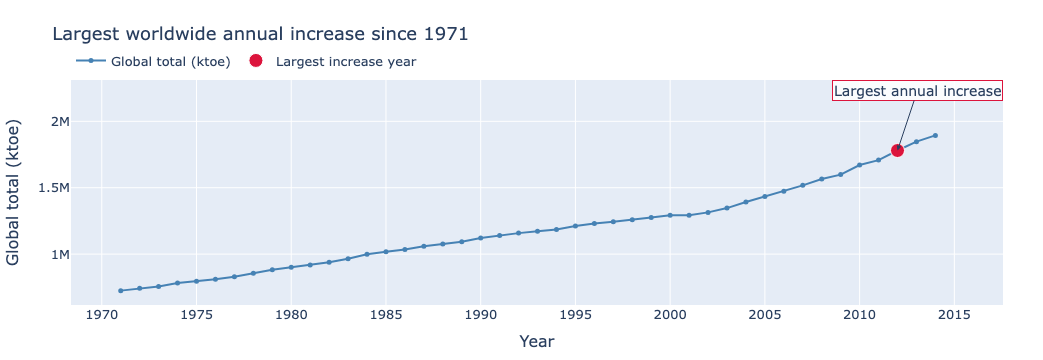

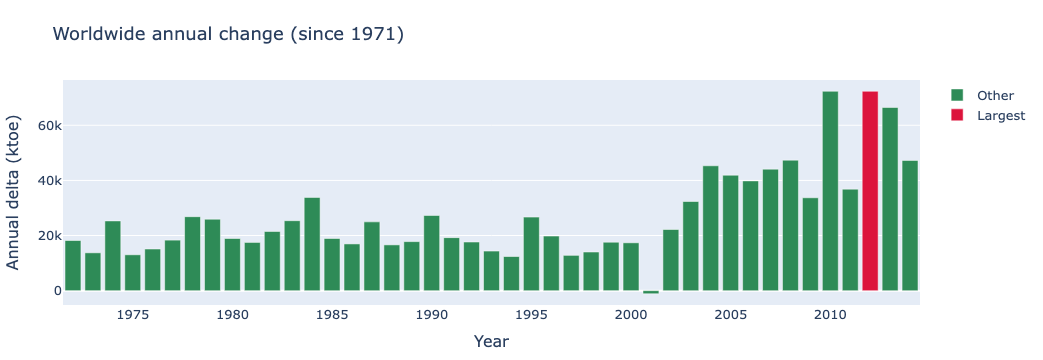

In [44]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px


df = pd.read_csv('renewable_energy.csv')
df.columns = df.columns.str.strip().str.replace('"','')
df['TIME'] = pd.to_numeric(df['TIME'], errors='coerce').astype('Int64')
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')


wld = df[(df['LOCATION'] == 'WLD') & (df['TIME'] >= 1971)& (df['TIME'] <= 2014)].copy()
if wld.empty:
    raise ValueError("No WLD rows found from 1971 onward in CSV.")


wld_yearly = wld.groupby('TIME')['Value'].sum().sort_index()


delta = wld_yearly.diff()
delta_nonan = delta.dropna() 


year_max = int(delta_nonan.idxmax())
increase = float(delta_nonan.max())


fig = go.Figure()
fig.add_trace(go.Scatter(
    x=wld_yearly.index, y=wld_yearly.values,
    mode='lines+markers',
    name='Global total (ktoe)',
    line=dict(width=2, color='steelblue'),
    marker=dict(size=5, color='steelblue')
))
fig.add_trace(go.Scatter(
    x=[year_max], y=[wld_yearly.loc[year_max]],
    mode='markers',
    marker=dict(size=14, color='crimson', line=dict(width=1, color='white')),
    name='Largest increase year'
))
fig.add_annotation(
    x=year_max, y=wld_yearly.loc[year_max],
    text=f"Largest annual increase",
    showarrow=True, arrowhead=2, ax=20, ay=-60,
    bgcolor='rgba(255,255,255,0.85)', bordercolor='crimson', borderwidth=1,
    font=dict(size=14)
)
fig.update_layout(
    title=f"Largest worldwide annual increase since 1971 ",
    xaxis_title="Year",
    yaxis_title="Global total (ktoe)",
    margin=dict(l=60, r=40, t=80, b=50),
    legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='left', x=0),
    font=dict(size=13)
)
fig.show()


d = delta_nonan.reset_index()
d.columns = ['Year','Delta']
d['Highlight'] = np.where(d['Year'] == year_max, 'Largest', 'Other')

fig2 = px.bar(
    d, x='Year', y='Delta', color='Highlight',
    color_discrete_map={'Largest':'crimson','Other':'seagreen'},
    title=f"Worldwide annual change (since 1971)"
)
fig2.update_layout(
    xaxis_title='Year',
    yaxis_title='Annual delta (ktoe)',
    margin=dict(l=60, r=40, t=80, b=40),
    legend_title_text='',
    font=dict(size=13)
)
fig2.update_traces(marker_line_color='white', marker_line_width=0.5)
fig2.show()






Rows after cleaning and dropping WLD/OEU: 7672

Period 1990-2000: total_growth=161,098.3, positive_total=176,442.5
LOCATION      start        end  contribution  pct_of_pos_total
     NGA  52793.333  70169.860     17376.527          9.848267
     IND 139631.037 155407.682     15776.645          8.941523
     CHN 211337.628 225175.927     13838.299          7.842952
     IDN  45939.810  59223.527     13283.717          7.528639
     ETH  22119.414  30602.143      8482.729          4.807645
     CAN  36329.706  44584.865      8255.159          4.678668
     BRA  65533.550  72827.809      7294.259          4.134072
     USA  96165.112 101963.460      5798.348          3.286254
     PAK  20222.603  25477.224      5254.621          2.978093
     DEU   5312.972   8982.621      3669.649          2.079799


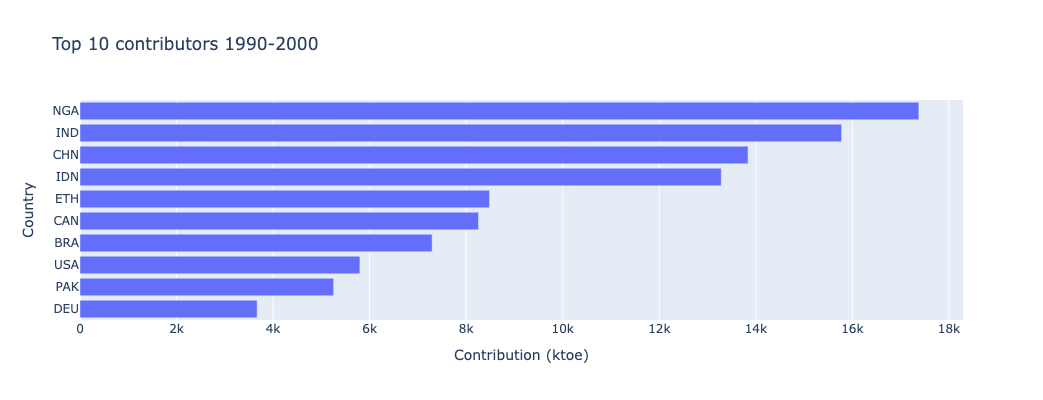

Saved plot to period_contributions/top10_contributors_1990_2000_noWLD_OEU.html

Period 2000-2010: total_growth=366,155.0, positive_total=378,061.6
LOCATION      start        end  contribution  pct_of_pos_total
     CHN 225175.927 286717.695     61541.768         16.278238
     BRA  72827.809 116832.401     44004.592         11.639530
     IND 155407.682 190748.898     35341.216          9.348005
     NGA  70169.860  98270.975     28101.115          7.432946
     USA 101963.460 125256.236     23292.776          6.161106
     DEU   8982.621  27568.208     18585.587          4.916021
     ITA  10112.282  21863.926     11751.644          3.108394
     IDN  59223.527  69666.790     10443.263          2.762318
     ETH  30602.143  40684.314     10082.171          2.666806
     ESP   6814.823  15047.537      8232.714          2.177612


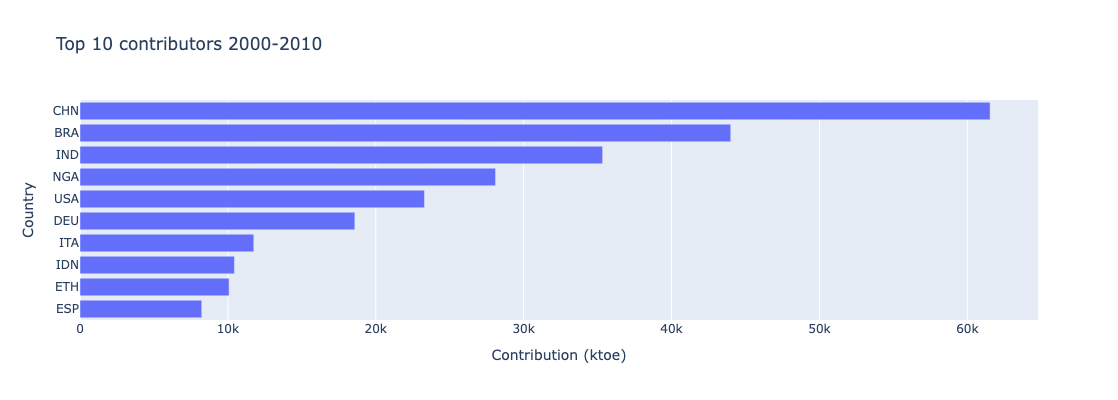

Saved plot to period_contributions/top10_contributors_2000_2010_noWLD_OEU.html

Period 2010-2015: total_growth=86,236.7, positive_total=87,049.6
LOCATION      start        end  contribution  pct_of_pos_total
     USA 125256.236 149614.491     24358.255         27.982046
     DEU  27568.208  38962.102     11393.894         13.088970
     GBR   7348.996  13786.309      6437.313          7.394996
     CAN  43558.807  49703.237      6144.430          7.058540
     SWE  16995.736  22946.296      5950.560          6.835828
     ITA  21863.926  26331.637      4467.711          5.132375
     JPN  18946.391  22997.866      4051.475          4.654215
     TUR  11626.044  15521.354      3895.310          4.474817
     CHL   6825.424   9583.484      2758.060          3.168378
     KOR   1811.720   4071.219      2259.499          2.595646


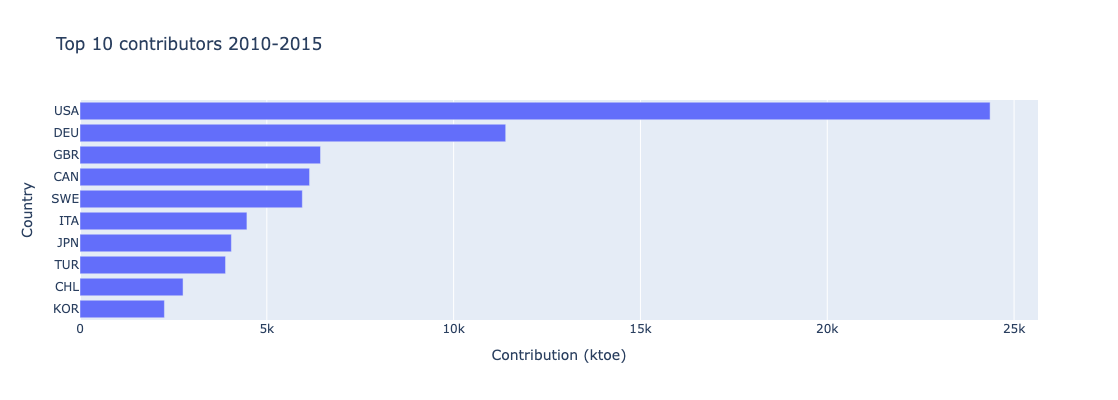

Saved plot to period_contributions/top10_contributors_2010_2015_noWLD_OEU.html

Saved CSVs and plots in folder: period_contributions


In [45]:
import pandas as pd
import numpy as np
import plotly.express as px
import os, re, unicodedata


csv_path = 'renewable_energy.csv'  
measure_filter = 'KTOE'             
use_iso3_only = True                
periods = [(1990, 2000), (2000, 2010), (2010, 2015)]
top_n = 10
out_dir = 'period_contributions'
os.makedirs(out_dir, exist_ok=True)


def clean_location(x):
    if pd.isna(x):
        return ''
    s = str(x)
    s = unicodedata.normalize('NFKC', s)
    s = s.strip().strip('"').strip("'")
    s = re.sub(r'[\u00A0\u2000-\u200F\u202F]', ' ', s)
    s = re.sub(r'[\x00-\x1f\x7f]', '', s)
    s = re.sub(r'\s+', '', s)
    return s.upper()


df = pd.read_csv(csv_path)
df.columns = df.columns.str.strip().str.replace('"','')
df['TIME'] = pd.to_numeric(df['TIME'], errors='coerce').astype('Int64')
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')


if measure_filter:
    df = df[df['MEASURE'] == measure_filter].copy()


df['LOCATION2'] = df['LOCATION'].apply(clean_location)


aggregates_to_drop = {'WLD','OEU'} 
df = df[~df['LOCATION2'].isin(aggregates_to_drop)].copy()


if use_iso3_only:
    mask = df['LOCATION2'].str.len() == 3
    mask = mask & df['LOCATION2'].str.isalpha()
    df = df[mask].copy()

print("Rows after cleaning and dropping WLD/OEU:", len(df))


def contributions_for_period(df_in, start_year, end_year):
    df_local = df_in.copy()
    vals = (df_local[df_local['TIME'].isin([start_year, end_year])]
            .groupby(['LOCATION2','TIME'])['Value']
            .median()
            .unstack(level='TIME'))
    if start_year not in vals.columns:
        vals[start_year] = np.nan
    if end_year not in vals.columns:
        vals[end_year] = np.nan
    vals['start'] = vals[start_year]
    vals['end'] = vals[end_year]
    vals['contribution'] = vals['end'] - vals['start']
    vals = vals[~(vals['start'].isna() & vals['end'].isna())].copy()
    total_growth = vals['contribution'].sum()
    pos_total = vals.loc[vals['contribution']>0, 'contribution'].sum()
    vals['pct_of_pos_total'] = vals['contribution'] / pos_total * 100 if pos_total != 0 else np.nan
    vals = vals.sort_values('contribution', ascending=False)
    vals.index.name = 'LOCATION'
    return vals, total_growth, pos_total


summary = {}
for start, end in periods:
    vals, total_growth, pos_total = contributions_for_period(df, start, end)
    fname = os.path.join(out_dir, f'contributions_{start}_{end}_noWLD_OEU.csv')
    vals.to_csv(fname, index=True)
    top = vals.head(top_n).reset_index()[['LOCATION','start','end','contribution','pct_of_pos_total']]
    summary[(start,end)] = {'total_growth': total_growth, 'pos_total': pos_total, 'top': top, 'all': vals}
    print(f"\nPeriod {start}-{end}: total_growth={total_growth:,.1f}, positive_total={pos_total:,.1f}")
    print(top.to_string(index=False))

 
    if len(top) > 0:
        fig = px.bar(top.sort_values('contribution'),
                     x='contribution', y='LOCATION',
                     orientation='h',
                     title=f'Top {top_n} contributors {start}-{end}',
                     labels={'contribution':'Contribution (ktoe)','LOCATION':'Country'},
                     width=900, height=400)
        fig.update_layout(yaxis={'categoryorder':'total ascending'})
        html_out = os.path.join(out_dir, f'top{top_n}_contributors_{start}_{end}_noWLD_OEU.html')
        fig.write_html(html_out)
        fig.show()
        print('Saved plot to', html_out)
    else:
        print('No data to plot for this period')

print('\nSaved CSVs and plots in folder:', out_dir)




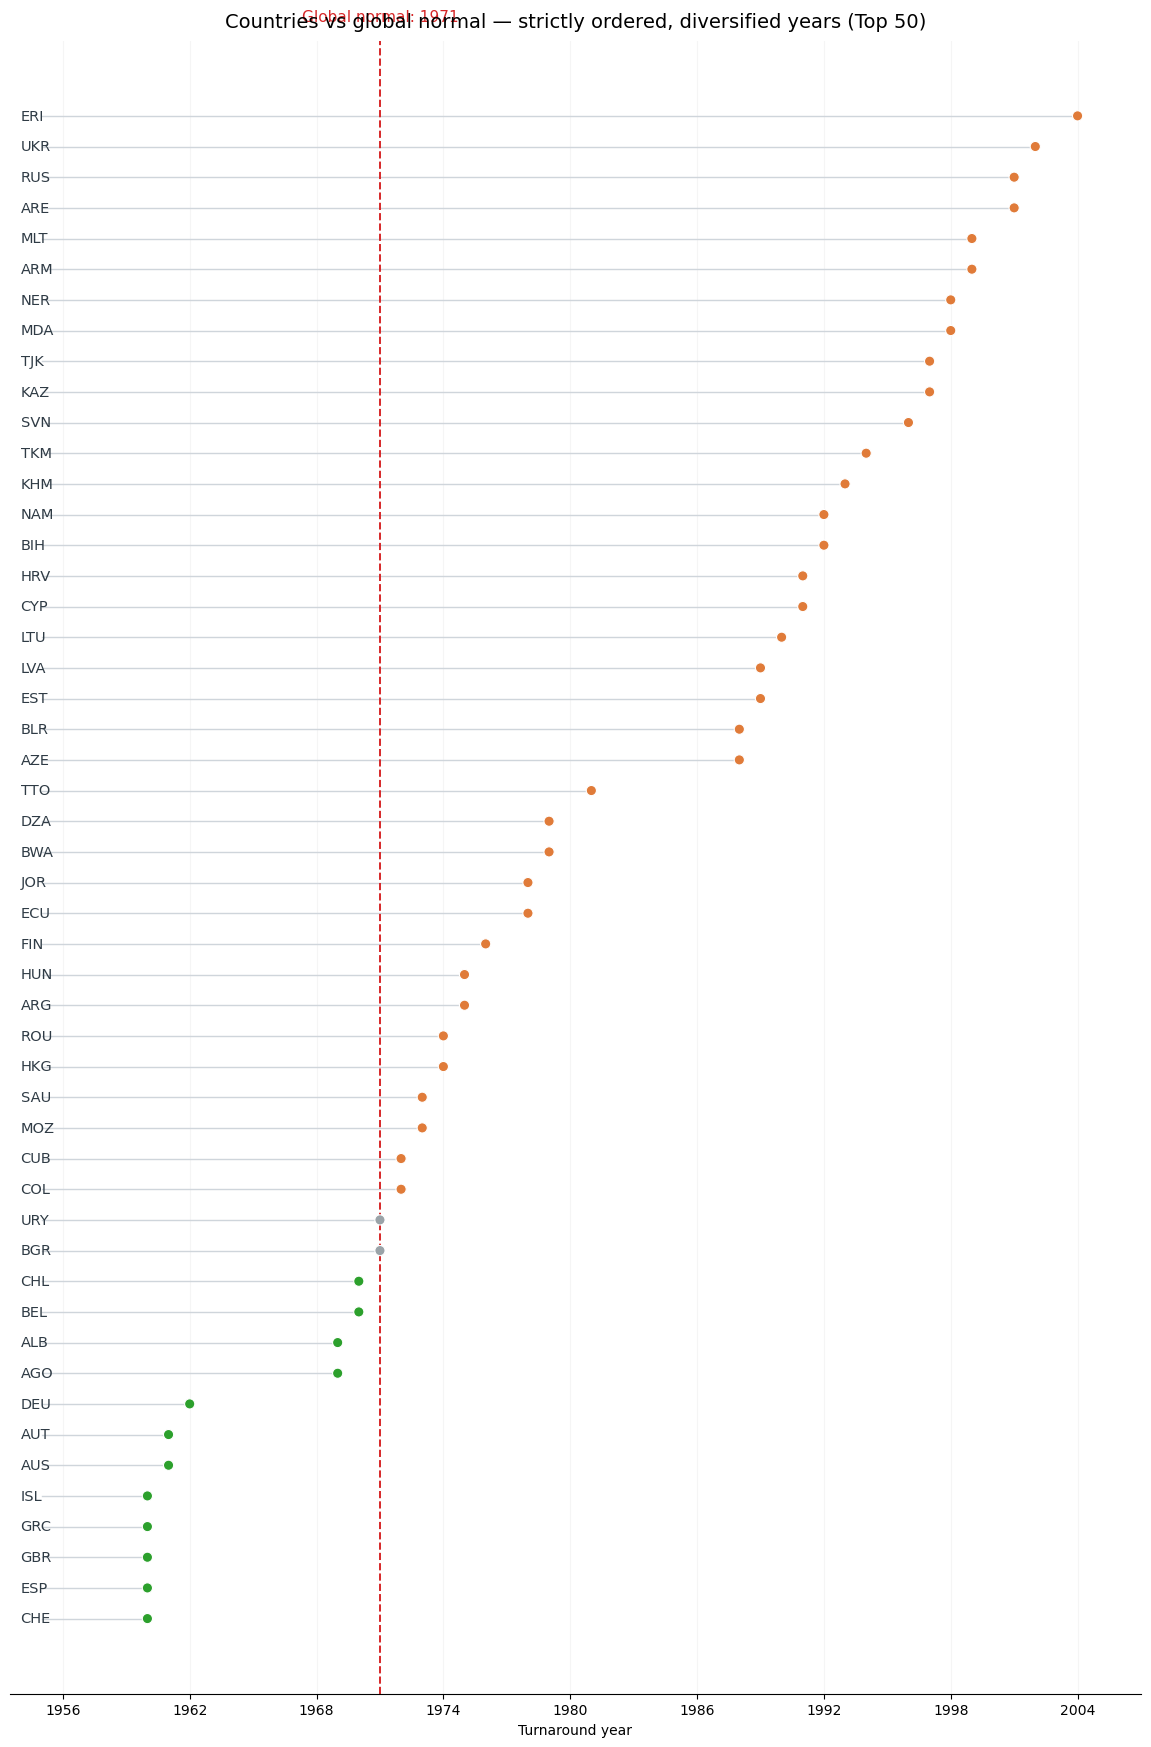

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


res = res_df.dropna(subset=['turn_year']).copy()
res['turn_year'] = res['turn_year'].astype(int)
normal = int(normal_year)
res['lead_years'] = (normal - res['turn_year']).astype(int)

def cls(ly):
    if ly > 0: return 'Before'
    if ly == 0: return 'At'
    return 'After'
res['class'] = res['lead_years'].apply(cls)


color_map = {'Before':'#2ca02c','At':'#9aa3a8','After':'#e07b39'}


res['class_cat'] = pd.Categorical(res['class'], categories=['Before','At','After'], ordered=True)
res_sorted = res.sort_values(['class_cat','turn_year','lead_years'], ascending=[True, True, False]).copy()


target_n = 50
max_per_year = 2

picked = []
counts_per_year = {}


for _, row in res_sorted.iterrows():
    if len(picked) >= target_n:
        break
    y = row['turn_year']
    c = counts_per_year.get(y, 0)
    if c < max_per_year:
        picked.append(row)
        counts_per_year[y] = c + 1

# Runde 2: auffüllen, bevorzugt Jahre mit bisher wenigen Picks
if len(picked) < target_n:
    remaining = res_sorted.loc[~res_sorted.index.isin(pd.DataFrame(picked).index)].copy()
    remaining['year_fill_score'] = remaining['turn_year'].map(lambda y: -counts_per_year.get(y, 0))
    remaining = remaining.sort_values(['year_fill_score','class_cat','turn_year','lead_years'],
                                      ascending=[True, True, True, False])
    for _, row in remaining.iterrows():
        if len(picked) >= target_n:
            break
        picked.append(row)
        y = row['turn_year']
        counts_per_year[y] = counts_per_year.get(y, 0) + 1

dfp = pd.DataFrame(picked).reset_index(drop=True)

# Endgültige, strikte Ordnung: Klasse → Jahr → Lead
dfp['class_cat'] = pd.Categorical(dfp['class'], categories=['Before','At','After'], ordered=True)
dfp = dfp.sort_values(['class_cat','turn_year','lead_years'], ascending=[True, True, False]).reset_index(drop=True)

# Y-Positionen: eine Zeile pro Land (keine Kreuzungen möglich)
y = np.arange(len(dfp))

# Plot
fig_h = max(8, 0.34*len(dfp) + 2)
fig, ax = plt.subplots(figsize=(14.5, fig_h))

# Punkte rechts, ISO3-Kürzel links, nur Kürzel (kein Jahr/Lead/Badge)
ax.scatter(dfp['turn_year'], y, s=54, c=dfp['class'].map(color_map),
           edgecolor='white', lw=0.8, zorder=3)

# Label-Spalte (nur ISO3), horizontale Verbinder zur klaren Zuordnung
x_label = dfp['turn_year'].min() - 6
for xi, yi in zip(dfp['turn_year'], y):
    ax.plot([x_label + 1.0, xi - 0.2], [yi, yi], color='#cfd5db', lw=1.0, zorder=2)

for loc, yi in zip(dfp['LOCATION'], y):
    ax.text(x_label, yi, f"{loc}", fontsize=10.5, color='#2f3b45', va='center')

# Globale Normal-Linie
ax.axvline(normal, color='#d62728', ls='--', lw=1.4)
ax.text(normal, 1.01, f"Global normal: {normal}",
        color='#d62728', ha='center', va='bottom',
        transform=ax.get_xaxis_transform(), fontsize=11)

# Achsen/Styling
ax.set_yticks([])  # keine y-Achse (nur die linke Kürzelspalte)
ax.set_xlabel("Turnaround year")
ax.set_title(f"Countries vs global normal — strictly ordered, diversified years (Top {len(dfp)})",
             fontsize=14, pad=10)

# X-Achse: nur ganze Jahre
ax.xaxis.set_major_locator(mtick.MaxNLocator(integer=True))
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))

ax.grid(axis='x', alpha=0.12)
for spine in ['top','right','left']:
    ax.spines[spine].set_visible(False)

# Grenzen: Platz links für Kürzel, rechts für Punkte
xmin = x_label - 0.5
xmax = max(normal, dfp['turn_year'].max()) + 3
ax.set_xlim(xmin, xmax)

plt.subplots_adjust(left=0.20, right=0.98, top=0.93, bottom=0.06)
plt.show()

